In [577]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import json

In [578]:
with open('dubai_properties.json', 'r') as file:
    dubai_properties = json.load(file)

In [579]:
print(dubai_properties)

[{'district': ['Act One | Act Two towers, Act One | Act Two towers, Downtown Dubai.', 'Al Wahaibi Building, Al Sufouh 1, Al Sufouh.', 'Dickens Circus 1, Dickens Circus, Motor City.', 'Al Sahab 2, Al Sahab, Dubai Marina.', 'Escan Tower, Dubai Marina.', 'Mosela Waterside Residences, The Views.', 'Downtown Views II, Downtown Views, Downtown Dubai.', 'Southwest Apartments, Green Community West, Green Community.', 'Golf Tower 3, Golf Towers, The Views.', 'Travo, The Views.', 'The Fairways, The Views.', 'New Dubai Gate 2, Jumeirah Lake Towers.', 'Mon Reve, Downtown Dubai.', 'Rawda Apartments 2, Rawda Apartments 2, Town Square.', 'Marina Residences 2, Marina Residences, Palm Jumeirah.', '1 Residences, 1 Residences, Al Kifaf.', '1 Residences, Wasl1, Al Kifaf.', 'Central Tower, Bay Central, Dubai Marina.', 'Widcombe House 1, Widcombe House, Motor City.', 'J ONE, Business Bay.', 'Binghatti Creek, Al Jaddaf.'], 'bedroom': ['2', '2', '0', '2', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '2',

In [580]:
dubai_df = pd.DataFrame()
for prop in dubai_properties:
    df = pd.DataFrame(prop)
    dubai_df = pd.concat(objs=[dubai_df,df],ignore_index=True)
dubai_df.head()

,district,bedroom,bathroom,square,price
0,"Act One | Act Two towers, Act One | Act Two to...",2,2,"1,239 sq.ft",185 000 AED Per Annum
1,"Al Wahaibi Building, Al Sufouh 1, Al Sufouh.",2,2,"1,824 sq.ft",120 000 AED Per Annum
2,"Dickens Circus 1, Dickens Circus, Motor City.",0,1,688 sq.ft,55 000 AED Per Annum
3,"Al Sahab 2, Al Sahab, Dubai Marina.",2,3,"1,351 sq.ft",180 000 AED Per Annum
4,"Escan Tower, Dubai Marina.",1,1,836 sq.ft,58 000 AED Per Annum


CLEANING AND PREPARING DATASET FOR FUTURE MODEL

In [581]:
def cut_district(x):
    return x.replace('.','').split(',')[-1]
def get_price(x):
    x = x.split()[:2]
    return ''.join(x)

dubai_df_new = dubai_df.copy()   
dubai_df_new['district'] = dubai_df_new['district'].apply(cut_district)
dubai_df_new['square']  = dubai_df_new['square'].apply(lambda x : x.split()[0].replace(',',''))
dubai_df_new['price'] = dubai_df_new['price'].apply(get_price)
dubai_df_new.head()

,district,bedroom,bathroom,square,price
0,Downtown Dubai,2,2,1239,185000
1,Al Sufouh,2,2,1824,120000
2,Motor City,0,1,688,55000
3,Dubai Marina,2,3,1351,180000
4,Dubai Marina,1,1,836,58000


In [582]:
dubai_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  546 non-null    object
 1   bedroom   546 non-null    object
 2   bathroom  546 non-null    object
 3   square    546 non-null    object
 4   price     546 non-null    object
dtypes: object(5)
memory usage: 21.5+ KB


In [583]:
# fix this statement
dubai_df_new[dubai_df_new['bathroom'] == '1.5']

,district,bedroom,bathroom,square,price
20,Al Jaddaf,1,1.5,665,75000
74,Deira,2,1.5,1059,60000
79,Deira,2,1.5,1059,60000
132,Downtown Dubai,1,1.5,906,140000
159,Downtown Dubai,1,1.5,983,160000
393,Dubai Marina,1,1.5,1073,160000
398,Downtown Dubai,1,1.5,841,240000
442,Deira,2,1.5,970,60000
443,Deira,2,1.5,1025,60000
444,Deira,2,1.5,1026,60000


In [584]:
dubai_df_new = dubai_df_new.replace({
    'bathroom' : ['1.5','0'],
    'bedroom' : '0',
}, 1)
dubai_df_new = dubai_df_new.replace({
    'bathroom' : '2.5'
}, 2)
dubai_df_new = dubai_df_new.replace({
    'bathroom' : '3.5'
}, 3)

In [585]:
dubai_df_new[dubai_df_new['bedroom'] == '0']

,district,bedroom,bathroom,square,price


In [586]:
dubai_df_new[dubai_df_new['price'] == 'Priceon']

,district,bedroom,bathroom,square,price
346,DIFC,3,5,3218,Priceon


In [587]:
dubai_df_new = dubai_df_new[dubai_df_new['price'] != 'Priceon']
dubai_df_new[dubai_df_new['price'] == 'Priceon']

,district,bedroom,bathroom,square,price


In [588]:
# let's change the type of our columns
dubai_df_new['bedroom'] = dubai_df_new['bedroom'].astype('int8')
dubai_df_new['bathroom'] = dubai_df_new['bathroom'].astype('int16')
dubai_df_new['square'] = dubai_df_new['square'].astype('int64')
dubai_df_new['price'] = dubai_df_new['price'].astype('int64')
dubai_df_new.head()

,district,bedroom,bathroom,square,price
0,Downtown Dubai,2,2,1239,185000
1,Al Sufouh,2,2,1824,120000
2,Motor City,1,1,688,55000
3,Dubai Marina,2,3,1351,180000
4,Dubai Marina,1,1,836,58000


In [589]:
dubai_df_new = dubai_df_new.rename(columns={'square' : 'sq/ft', 'price': 'price_AED_per_annum'})
dubai_df_new.head()

,district,bedroom,bathroom,sq/ft,price_AED_per_annum
0,Downtown Dubai,2,2,1239,185000
1,Al Sufouh,2,2,1824,120000
2,Motor City,1,1,688,55000
3,Dubai Marina,2,3,1351,180000
4,Dubai Marina,1,1,836,58000


In [590]:
dubai_df_new['price_$_per_annum'] = dubai_df_new['price_AED_per_annum'] * 0.272294
dubai_df_new.head()

,district,bedroom,bathroom,sq/ft,price_AED_per_annum,price_$_per_annum
0,Downtown Dubai,2,2,1239,185000,50374.390
1,Al Sufouh,2,2,1824,120000,32675.280
2,Motor City,1,1,688,55000,14976.170
3,Dubai Marina,2,3,1351,180000,49012.920
4,Dubai Marina,1,1,836,58000,15793.052


In [591]:
len(dubai_df_new['district'].unique())

43

In [592]:
# how namy appartment in each district

locatiion_stats = dubai_df_new.groupby('district')['district'].agg('count').sort_values(ascending=False)
locatiion_stats

district
 Dubai Marina                         108
 Downtown Dubai                        99
 Palm Jumeirah                         51
 Jumeirah Beach Residence              38
 Business Bay                          37
 Jumeirah Lake Towers                  18
 Dubai Creek Harbour (The Lagoons)     18
 The Views                             15
 Dubai Hills Estate                    14
 DIFC                                  14
 Motor City                            11
 Sheikh Zayed Road                      9
 Jumeirah                               8
 Al Kifaf                               8
 Greens                                 7
 Dubai Harbour                          7
 Deira                                  7
 Old Town                               6
 Bluewaters                             6
 Jumeirah Village Circle                5
 Dubai Sports City                      5
 Green Community                        5
 Town Square                            5
 Umm Suqeim              

In [593]:
dubai_df_new['district'] = dubai_df_new['district'].apply(lambda x : x.lstrip())

FEATURE ENGIINERING

In [594]:
dubai_df_new['price_per_sq/ft_per_annum'] = dubai_df_new['price_$_per_annum']/dubai_df_new['sq/ft']
dubai_df_new.head(5)

,district,bedroom,bathroom,sq/ft,price_AED_per_annum,price_$_per_annum,price_per_sq/ft_per_annum
0,Downtown Dubai,2,2,1239,185000,50374.390,40.657296
1,Al Sufouh,2,2,1824,120000,32675.280,17.914079
2,Motor City,1,1,688,55000,14976.170,21.767689
3,Dubai Marina,2,3,1351,180000,49012.920,36.278993
4,Dubai Marina,1,1,836,58000,15793.052,18.891211


<Figure size 800x1200 with 0 Axes>

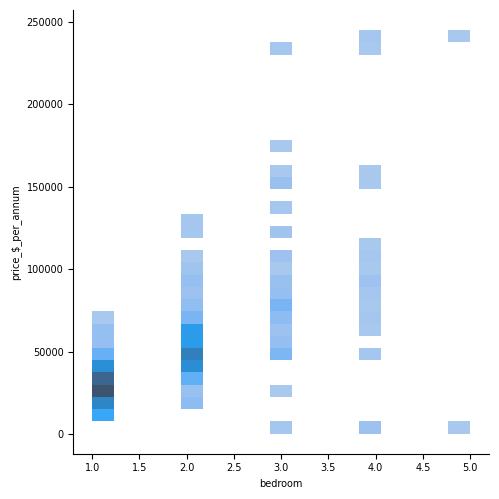

In [595]:
plt.figure(figsize=(8,12))
sns.displot(data=dubai_df_new, x='bedroom',y='price_$_per_annum')

<Figure size 800x1200 with 0 Axes>

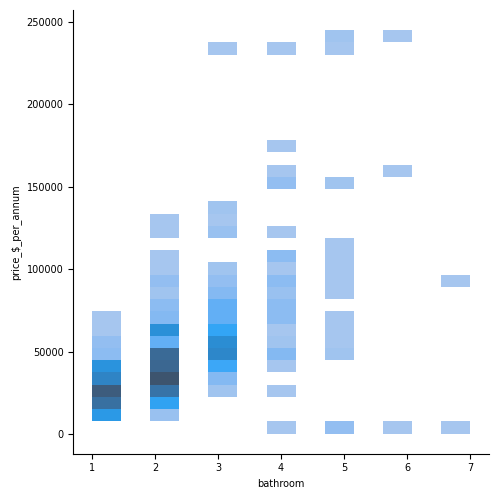

In [596]:
plt.figure(figsize=(8,12))
sns.displot(data=dubai_df_new, x='bathroom',y='price_$_per_annum')

<Axes: xlabel='price_$_per_annum', ylabel='Count'>

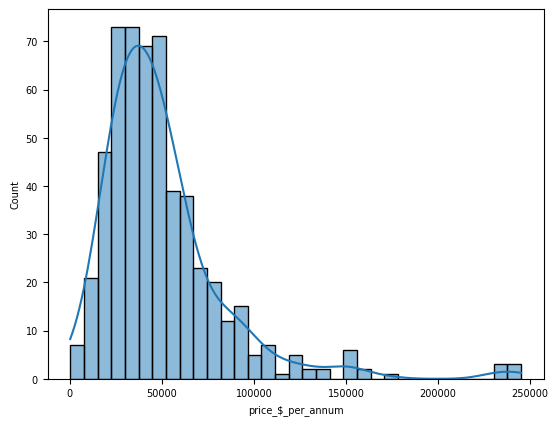

In [597]:
sns.histplot(dubai_df_new['price_$_per_annum'],kde=True)

<Axes: xlabel='price_$_per_annum', ylabel='Count'>

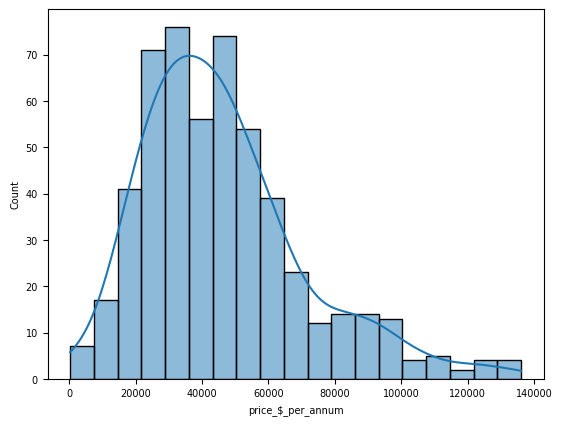

In [598]:
mean = dubai_df_new['price_$_per_annum'].mean()
std = dubai_df_new['price_$_per_annum'].std()
min = dubai_df_new['price_$_per_annum'].mean() - 3*std
max = dubai_df_new['price_$_per_annum'].std() + 3*std

dubai_df_new = dubai_df_new[(dubai_df_new['price_$_per_annum']<max) & (dubai_df_new['price_$_per_annum']>min)]
sns.histplot(dubai_df_new['price_$_per_annum'],kde=True)

<Axes: xlabel='sq/ft', ylabel='Count'>

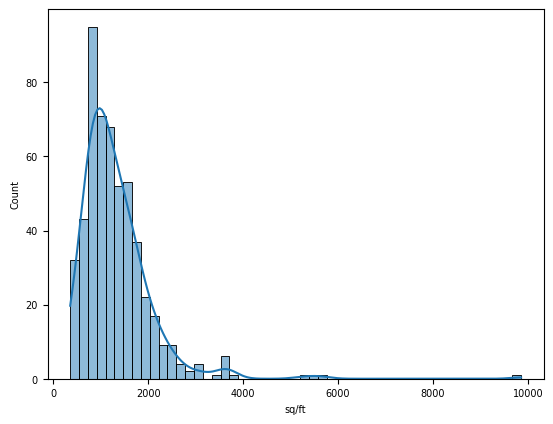

In [599]:
sns.histplot(dubai_df_new['sq/ft'],kde=True)

<Axes: xlabel='sq/ft', ylabel='Count'>

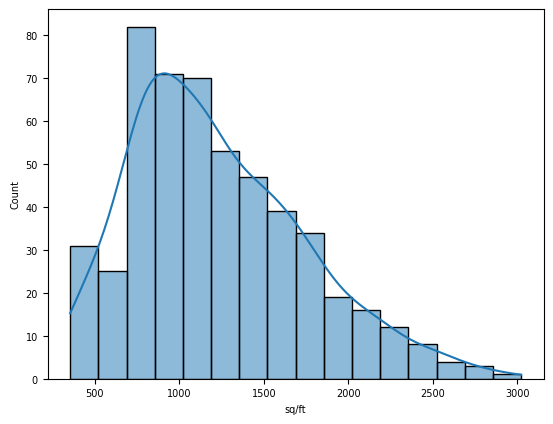

In [600]:
mean = dubai_df_new['sq/ft'].mean()
std = dubai_df_new['sq/ft'].std()
min = dubai_df_new['sq/ft'].mean() - 3*std
max = dubai_df_new['sq/ft'].std() + 3*std

dubai_df_new = dubai_df_new[(dubai_df_new['sq/ft']<max) & (dubai_df_new['sq/ft']>min)]
sns.histplot(dubai_df_new['sq/ft'],kde=True)

<Axes: xlabel='price_per_sq/ft_per_annum', ylabel='Count'>

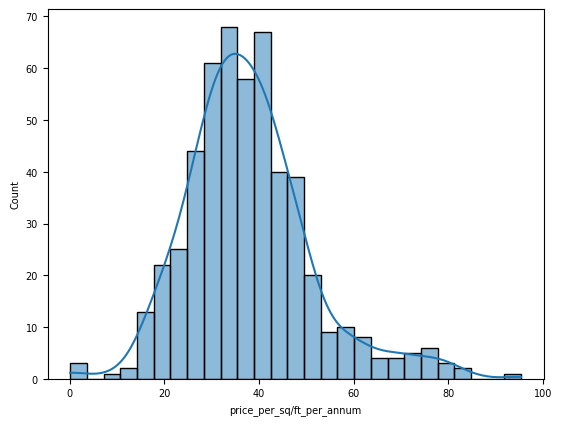

In [601]:
sns.histplot(dubai_df_new['price_per_sq/ft_per_annum'],kde=True)

<Axes: title={'center': 'Distribution'}, xlabel='price_$_per_annum', ylabel='district'>

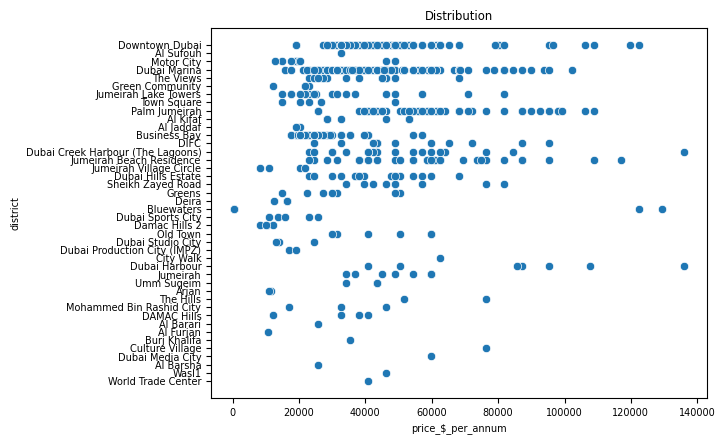

In [602]:
plt.title('Distribution')
plt.rcParams['font.size'] = '7'
sns.scatterplot(x = dubai_df_new['price_$_per_annum'],y=dubai_df_new['district'])

In [603]:
dubai_df_new.head()

,district,bedroom,bathroom,sq/ft,price_AED_per_annum,price_$_per_annum,price_per_sq/ft_per_annum
0,Downtown Dubai,2,2,1239,185000,50374.390,40.657296
1,Al Sufouh,2,2,1824,120000,32675.280,17.914079
2,Motor City,1,1,688,55000,14976.170,21.767689
3,Dubai Marina,2,3,1351,180000,49012.920,36.278993
4,Dubai Marina,1,1,836,58000,15793.052,18.891211


PREPARING FOR MODEL

In [604]:
dummies = pd.get_dummies(dubai_df_new['district'],drop_first=True)
dubai_df_new = pd.concat([dubai_df_new,dummies],axis=1)
dubai_df_new.head(3)

,district,bedroom,bathroom,sq/ft,price_AED_per_annum,price_$_per_annum,price_per_sq/ft_per_annum,Al Barsha,Al Furjan,Al Jaddaf,...,Motor City,Old Town,Palm Jumeirah,Sheikh Zayed Road,The Hills,The Views,Town Square,Umm Suqeim,Wasl1,World Trade Center
0,Downtown Dubai,2,2,1239,185000,50374.39,40.657296,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Al Sufouh,2,2,1824,120000,32675.28,17.914079,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Motor City,1,1,688,55000,14976.17,21.767689,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [605]:
x = dubai_df_new.drop(['district', 'price_AED_per_annum'],axis=1)
y = dubai_df_new['price_$_per_annum']
x

,bedroom,bathroom,sq/ft,price_$_per_annum,price_per_sq/ft_per_annum,Al Barsha,Al Furjan,Al Jaddaf,Al Kifaf,Al Sufouh,...,Motor City,Old Town,Palm Jumeirah,Sheikh Zayed Road,The Hills,The Views,Town Square,Umm Suqeim,Wasl1,World Trade Center
0,2,2,1239,50374.390,40.657296,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1824,32675.280,17.914079,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,688,14976.170,21.767689,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,3,1351,49012.920,36.278993,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,836,15793.052,18.891211,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,1,1,861,35942.808,41.745422,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542,1,2,1410,24506.460,17.380468,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543,2,2,1285,62627.620,48.737447,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544,2,2,1284,46289.980,36.051386,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [606]:
# GET MUTUAL INFO
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(x,y):
    x = x[['price_$_per_annum','sq/ft','bedroom','bathroom','price_per_sq/ft_per_annum']]
    mi_scores=mutual_info_regression(x,y)
    mi_scores=pd.Series(mi_scores,name='MI scores',index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x,y)
mi_scores

price_$_per_annum            3.933731
sq/ft                        0.566416
bedroom                      0.348684
price_per_sq/ft_per_annum    0.346444
bathroom                     0.278953
Name: MI scores, dtype: float64

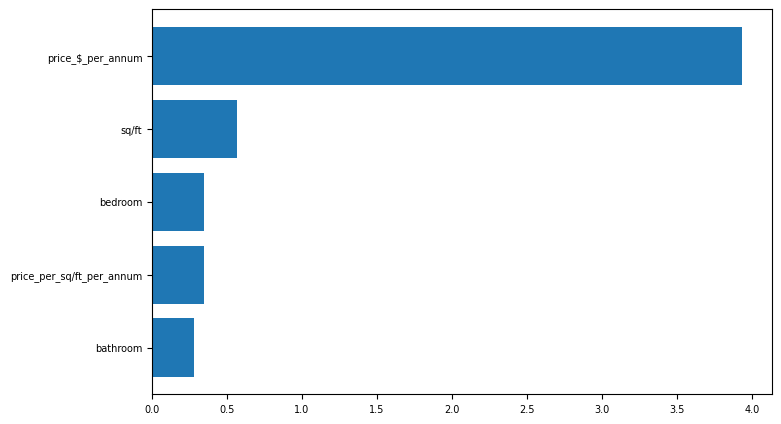

In [607]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

In [608]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = x.drop(['price_per_sq/ft_per_annum','price_$_per_annum'],axis=1)
x_feature = x.columns.to_list()
#x = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [609]:
x_train

,bedroom,bathroom,sq/ft,Al Barsha,Al Furjan,Al Jaddaf,Al Kifaf,Al Sufouh,Arjan,Bluewaters,...,Motor City,Old Town,Palm Jumeirah,Sheikh Zayed Road,The Hills,The Views,Town Square,Umm Suqeim,Wasl1,World Trade Center
43,2,2,1898,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,2,2,966,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
406,2,4,1553,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,2,1,1059,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,1,1,1159,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2,2,1329,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,1,2,953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,1,2,713,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240,1,1,473,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [610]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.59984242, 0.48650348, 0.60615556, 0.65082601, 0.47605072])

In [611]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

model_params = {
    'LinearReg' : {
        'model' : LinearRegression(),
        'params' : {
            'positive' : [True,False]
        }
    },
    'Random_Forest' : {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : [1,5,10,20],
            'max_depth' : [5,10,12],
            'max_samples' : [5,20,50,100]
        }
    },
     'DesTree' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['squared_error','friedman_mse'],
            'splitter' : ['best','random']
        }
    },
    'XgBoost' : {
        'model' : XGBRegressor(),
        'params' : {
            'n_estimators' : [200,500,1000],
            'learning_rate' : [0.01,0.05,0.001],
            'n_jobs' : [4,5,7]
        }
    }
}

In [612]:
from sklearn.model_selection import ShuffleSplit
scores = []
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df.sort_values(by='best_score',ascending=False)
# According to the dataframe below we will definetly use LinearRegression model for prediction in our project

,model,best_score,best_params
3,XgBoost,0.641310,"{'learning_rate': 0.05, 'n_estimators': 200, '..."
0,LinearReg,0.563876,{'positive': False}
2,DesTree,0.552540,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
1,Random_Forest,0.524462,"{'max_depth': 12, 'max_samples': 100, 'n_estim..."


In [613]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
cross_val_score(XGBRegressor(n_estimators = 200, learning_rate = 0.05,n_jobs = 7),x,y)

array([0.64831617, 0.63382735, 0.5903467 , 0.64806063, 0.70440178])

In [614]:
model = XGBRegressor(n_estimators = 200, learning_rate = 0.05,n_jobs = 4)
model.fit(x_train,y_train,early_stopping_rounds=5,eval_set=[(x_test,y_test)])
model.score(x_test,y_test)

[0]	validation_0-rmse:46999.26853
[1]	validation_0-rmse:44756.02698
[2]	validation_0-rmse:42642.28182
[3]	validation_0-rmse:40603.41727
[4]	validation_0-rmse:38697.22190
[5]	validation_0-rmse:36876.74415
[6]	validation_0-rmse:35176.98782
[7]	validation_0-rmse:33545.30262
[8]	validation_0-rmse:32016.95182
[9]	validation_0-rmse:30561.80614
[10]	validation_0-rmse:29225.55515
[11]	validation_0-rmse:27921.50905
[12]	validation_0-rmse:26723.37017
[13]	validation_0-rmse:25565.08241
[14]	validation_0-rmse:24484.88711
[15]	validation_0-rmse:23509.78026
[16]	validation_0-rmse:22556.58104
[17]	validation_0-rmse:21659.51439
[18]	validation_0-rmse:20831.86482
[19]	validation_0-rmse:20027.19654
[20]	validation_0-rmse:19291.61483
[21]	validation_0-rmse:18587.88461
[22]	validation_0-rmse:17964.42399
[23]	validation_0-rmse:17340.31317
[24]	validation_0-rmse:16762.01657
[25]	validation_0-rmse:16236.26137
[26]	validation_0-rmse:15730.14526
[27]	validation_0-rmse:15291.03221
[28]	validation_0-rmse:14815.6

c:\Users\Polina\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-rmse:11352.31410
[42]	validation_0-rmse:11203.43093
[43]	validation_0-rmse:11093.63494
[44]	validation_0-rmse:10987.81838
[45]	validation_0-rmse:10884.53176
[46]	validation_0-rmse:10801.14098
[47]	validation_0-rmse:10700.30127
[48]	validation_0-rmse:10590.54796
[49]	validation_0-rmse:10515.49699
[50]	validation_0-rmse:10412.08824
[51]	validation_0-rmse:10320.00833
[52]	validation_0-rmse:10239.17660
[53]	validation_0-rmse:10181.58508
[54]	validation_0-rmse:10116.20586
[55]	validation_0-rmse:10080.15620
[56]	validation_0-rmse:10030.81662
[57]	validation_0-rmse:10016.88344
[58]	validation_0-rmse:9974.48121
[59]	validation_0-rmse:9968.21936
[60]	validation_0-rmse:9942.99124
[61]	validation_0-rmse:9932.40706
[62]	validation_0-rmse:9910.05402
[63]	validation_0-rmse:9896.16456
[64]	validation_0-rmse:9877.48536
[65]	validation_0-rmse:9868.23976
[66]	validation_0-rmse:9856.71589
[67]	validation_0-rmse:9854.17446
[68]	validation_0-rmse:9852.07880
[69]	validation_0-rmse:9850.772

0.7945252397934831

In [615]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model,random_state=1).fit(x_test,y_test)
eli5.show_weights(perm,feature_names = x_test.columns.tolist())

Weight,Feature
0.6021 ± 0.1610,sq/ft
0.2904 ± 0.0658,bedroom
0.1134 ± 0.0343,Dubai Harbour
0.0992 ± 0.0541,Palm Jumeirah
0.0403 ± 0.0301,Downtown Dubai
0.0140 ± 0.0152,Motor City
0.0131 ± 0.0136,Business Bay
0.0075 ± 0.0042,Deira
0.0066 ± 0.0042,Dubai Marina
0.0055 ± 0.0099,bathroom


In [630]:
x.columns

Index(['bedroom', 'bathroom', 'sq/ft', 'Al Barsha', 'Al Furjan', 'Al Jaddaf',
       'Al Kifaf', 'Al Sufouh', 'Arjan', 'Bluewaters', 'Burj Khalifa',
       'Business Bay', 'City Walk', 'Culture Village', 'DAMAC Hills', 'DIFC',
       'Damac Hills 2', 'Deira', 'Downtown Dubai',
       'Dubai Creek Harbour (The Lagoons)', 'Dubai Harbour',
       'Dubai Hills Estate', 'Dubai Marina', 'Dubai Media City',
       'Dubai Production City (IMPZ)', 'Dubai Sports City',
       'Dubai Studio City', 'Green Community', 'Greens', 'Jumeirah',
       'Jumeirah Beach Residence', 'Jumeirah Lake Towers',
       'Jumeirah Village Circle', 'Mohammed Bin Rashid City', 'Motor City',
       'Old Town', 'Palm Jumeirah', 'Sheikh Zayed Road', 'The Hills',
       'The Views', 'Town Square', 'Umm Suqeim', 'Wasl1',
       'World Trade Center'],
      dtype='object')

In [638]:

def predict_price(x,district,sqft,bath,bed):
    loc_index = np.where(x.columns==district)[0][0]
    
    x = np.zeros(len(x.columns))
    x[2] = sqft
    x[1] =  bath
    x[0] = bed
    if loc_index >= 0:
        x[loc_index] = 1
    x = x.reshape(1,-1)   
    return model.predict(x)[0]

predict_price(x,'Bluewaters', 1898, 2, 2)

102350.3

CREATE PICKLE FILE

In [644]:
import pickle
import os

def create_pickle_model():
    with open('Dubai_properties_prices_model.pickle','wb') as f:
        pickle.dump(model,f)
    
path = r'DubaiProject\model\Dubai_properties_prices_model.pickle'
if os.path.exists(path):
    os.remove(path)
    create_pickle_model()
else:
    create_pickle_model()

In [645]:
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))